In [14]:
%matplotlib inline 
   
import ipywidgets as widgets    
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

from IPython.display import clear_output

In [15]:
#ORB (oriented BRIEF) keypoint detector and descriptor extractor.
# cv::ORB::create 
# (
# int nfeatures = 500, 
# float scaleFactor = 1.2f, 
# int nlevels = 8, 
# int edgeThreshold = 31, 
# int firstLevel = 0, 
# int WTA_K = 2, 
# int scoreType = ORB::HARRIS_SCORE, 
# int patchSize = 31, 
# int fastThreshold = 20 
# )


In [18]:
image = cv2.imread('chess.png') # Sudoku
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


maxCorners:


A Jupyter Widget

qualityLevel:


A Jupyter Widget

Total Keypoints: 
2200


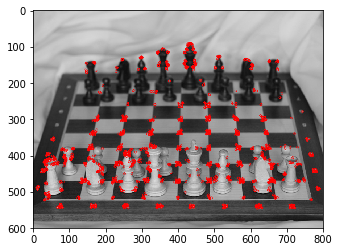

In [21]:
print('maxCorners:')
wMaxCorners = widgets.IntSlider(
    value=500,
    min=100,
    max=10000,
    step=100,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(wMaxCorners)

print('qualityLevel:')
wQuality = widgets.IntSlider(
    value=50,
    min=0,
    max=100,
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(wQuality)


img = image.copy() 

def paramsChanged(change):
    clear_output()

    print('maxCorners:')
    display(wMaxCorners)  
    print('qualityLevel:')  
    display(wQuality)
    
    image = cv2.imread('chess.png') # Sudoku
    img = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    try:
        src = np.float32(gray)
        orb = cv2.ORB_create()
        orb.setEdgeThreshold(wQuality.value)
        orb.setMaxFeatures(wMaxCorners.value)
        kp = orb.detect(gray)
        print("Total Keypoints: ")
        print(len(kp))
        imgCorners = cv2.drawKeypoints(gray, kp, None, color=(255,0,0))
        plt.imshow(imgCorners)
        plt.show()
        
    except:
        clear_output()
        print('Invalid parametres. Try again')
        print('maxCorners:')
        display(wMaxCorners)  
        print('qualityLevel:')  
        display(wQuality)
        

wMaxCorners.observe(paramsChanged, names='value')
wQuality.observe(paramsChanged, names='value')